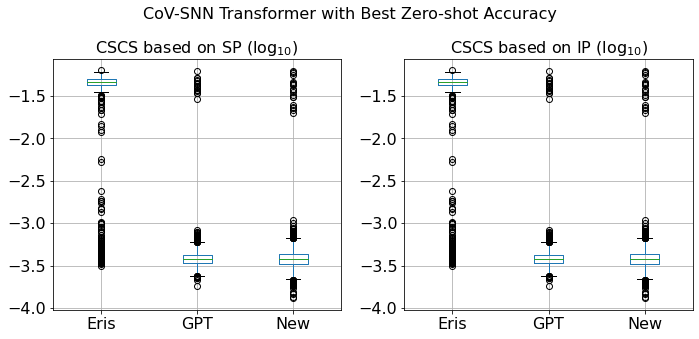

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the SentenceTransformer model
CHECKPOINT="4" #sys.argv[1] # X for CoV-RoBERTa, 0 for CoV-SNN with best test accuracy, 4 for CoV-SNN with best zero-shot accuracy 
DISTANCE="L2" #sys.argv[2] # L1 for Manhattan distance, L2 for Euclidean distance

# Overall title
if CHECKPOINT == "X":
    TITLE = "CoV-RoBERTa without Contrastive Learning"
elif CHECKPOINT == "4":
    TITLE = "CoV-SNN Transformer with Best Zero-shot Accuracy"
elif CHECKPOINT == "0":
    TITLE = "CoV-SNN Transformer with Best Test Accuracy"

# Reading the data
df_eris_cscs = pd.read_csv(f"outputs/cscs_CP{CHECKPOINT}_{DISTANCE}/cscs_values_eris.csv")
df_eris_cscs['cscs_sp'] = df_eris_cscs['log10(semantic_change)'] + df_eris_cscs['log10(grammaticality)']
df_eris_cscs['cscs_ip'] = df_eris_cscs['log10(semantic_change)'] + df_eris_cscs['log10(1/perplexity)']

df_new_cscs = pd.read_csv(f"outputs/cscs_CP{CHECKPOINT}_{DISTANCE}/cscs_values_new.csv")
df_new_cscs['cscs_sp'] = df_new_cscs['log10(semantic_change)'] + df_new_cscs['log10(grammaticality)']
df_new_cscs['cscs_ip'] = df_new_cscs['log10(semantic_change)'] + df_new_cscs['log10(1/perplexity)']

df_gpt_cscs = pd.read_csv(f"outputs/cscs_CP{CHECKPOINT}_{DISTANCE}/cscs_values_gpt.csv")
df_gpt_cscs['cscs_sp'] = df_gpt_cscs['log10(semantic_change)'] + df_gpt_cscs['log10(grammaticality)']
df_gpt_cscs['cscs_ip'] = df_gpt_cscs['log10(semantic_change)'] + df_gpt_cscs['log10(1/perplexity)']

# Combine the three DataFrames into one for easier plotting
df_combined = pd.concat([
    df_eris_cscs[['log10(grammaticality)', 'log10(semantic_change)', 'log10(1/perplexity)', 'cscs_sp', 'cscs_ip']].assign(source='Eris'),
    df_new_cscs[['log10(grammaticality)', 'log10(semantic_change)', 'log10(1/perplexity)', 'cscs_sp', 'cscs_ip']].assign(source='New'),
    df_gpt_cscs[['log10(grammaticality)', 'log10(semantic_change)', 'log10(1/perplexity)', 'cscs_sp', 'cscs_ip']].assign(source='GPT'),
])

# Plotting the boxplots
plt.figure(figsize=(10, 5))

# # Plot boxplots for log10(semantic_change)
# ax1 = plt.subplot(1, 5, 1)
# df_combined.boxplot(column='log10(semantic_change)', by='source', ax=ax1)
# plt.title('Semantic Change (log$_{10}$)')
# plt.suptitle('')
# plt.xlabel('')
# plt.ylabel('')

# # Plot boxplots for log10(grammaticality)
# ax2 = plt.subplot(1, 5, 2)
# df_combined.boxplot(column='log10(grammaticality)', by='source', ax=ax2)
# plt.title('Sequence Probability (log$_{10}$)')
# plt.suptitle('')  # Suppress the automatic title
# plt.xlabel('')
# plt.ylabel('')

# # Plot boxplots for log10(1/perplexity)
# ax3 = plt.subplot(1, 5, 3)
# df_combined.boxplot(column='log10(1/perplexity)', by='source', ax=ax3)
# plt.title('Inverse Perplexity (log$_{10}$)')
# plt.suptitle('')
# plt.xlabel('')
# plt.ylabel('')

# Plot boxplots for CSCS
ax4 = plt.subplot(1, 2, 1)
df_combined.boxplot(column='cscs_sp', by='source', ax=ax4)
plt.title('CSCS based on SP (log$_{10}$)')
plt.suptitle('')
plt.xlabel('')
plt.ylabel('')

# Plot boxplots for CSCS
ax5 = plt.subplot(1, 2, 2)
df_combined.boxplot(column='cscs_sp', by='source', ax=ax5)
plt.title('CSCS based on IP (log$_{10}$)')
plt.suptitle(f'{TITLE}')
plt.xlabel('')
plt.ylabel('')

# Font size settings
font_size = 16
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)

plt.tight_layout(rect=[0, 0.03, 1, 1.03])
fig_file_name = f"outputs/cscs_CP{CHECKPOINT}_{DISTANCE}/cscs_box_CP{CHECKPOINT}_{DISTANCE}.pdf"
plt.savefig(fig_file_name)
plt.show()
